In [27]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [28]:
pip install pingouin

In [29]:
import pandas as pd
import time
import seaborn as sns
from sklearn import preprocessing
import numpy as np
import warnings
from scipy import stats,integrate
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_style("darkgrid")
sns.set(color_codes=True)
pd.set_option('display.max_rows', None)
import pingouin as pg
from scipy.stats import linregress

### 500 days of summer

In [30]:
# drop0: remove the annotation sentences which were not alligned with clips in the movie
anno_500_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CHR_Code/MExtract_500Days.csv')

In [31]:
anno_500_df_drop0 = anno_500_df[anno_500_df['EndTime(s)'] != 0]

In [32]:
scaler = preprocessing.MinMaxScaler()
anno_500_df_drop0['Normalised Video Clip Index'] = scaler.fit_transform(anno_500_df_drop0[['StartTime(s)']])
anno_500_df_drop0['Normalised Plot Sentence Index'] = scaler.fit_transform(anno_500_df_drop0[['start_point']])

In [42]:
anno_500_df_drop0.to_csv('anno_500_index.csv', index=False)

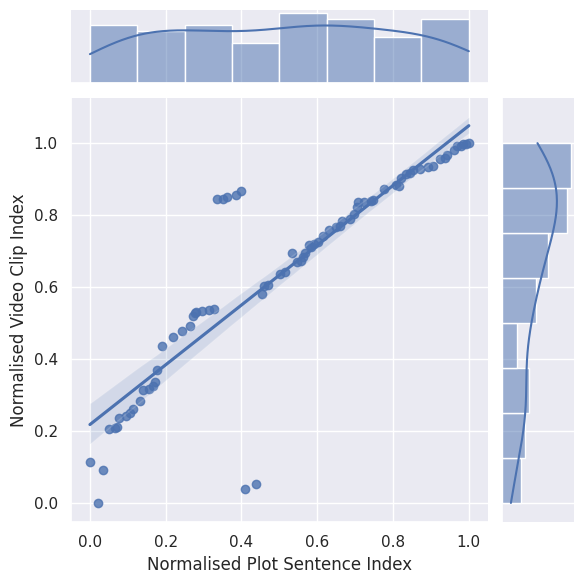

In [ ]:
sns.jointplot(data=anno_500_df_drop0, x="Normalised Plot Sentence Index", y="Normalised Video Clip Index", kind='reg');
# Normalised Plot Sentence Index
# Normalised Video Clip Index

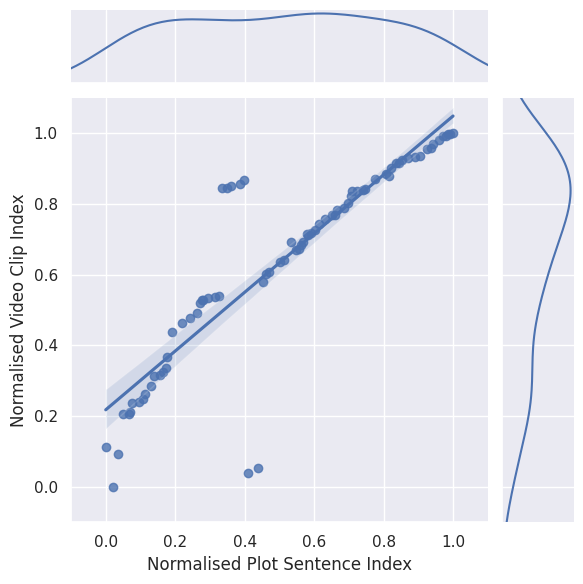

In [ ]:
g = sns.JointGrid(data=anno_500_df_drop0, x="Normalised Plot Sentence Index", y="Normalised Video Clip Index", xlim=(-0.1, 1.1), ylim=(-0.1, 1.1))
g.plot(sns.regplot, sns.kdeplot);

In [ ]:
x = anno_500_df_drop0['Normalised Plot Sentence Index']
y = anno_500_df_drop0['Normalised Video Clip Index']
pg.corr(x, y, method='pearson')

,n,r,CI95%,p-val,BF10,power
pearson,78,0.887875,"[0.83, 0.93]",2.431605e-27,1.32e+24,1.0


In [ ]:
linregress(x, y)

LinregressResult(slope=0.8306388668731503, intercept=0.21791062499293906, rvalue=0.8878753842067895, pvalue=2.43160481643411e-27, stderr=0.049373121194251315, intercept_stderr=0.029158217843010877)

In [ ]:
slope, intercept = np.polyfit(x, y, 1)
slope

0.8306388668731504

### Flight


In [33]:
# drop0: remove the annotation sentences which were not alligned with clips in the movie
anno_flight_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CHR_Code/MExtract_Flight.csv')

In [34]:
anno_flight_df_drop0 = anno_flight_df[anno_flight_df['EndTime(s)'] != 0]

In [35]:
scaler = preprocessing.MinMaxScaler()
anno_flight_df_drop0['Normalised Video Clip Index'] = scaler.fit_transform(anno_flight_df_drop0[['StartTime(s)']])
anno_flight_df_drop0['Normalised Plot Sentence Index'] = scaler.fit_transform(anno_flight_df_drop0[['start_point']])

In [41]:
anno_flight_df_drop0.to_csv('anno_flight_index.csv', index=False)

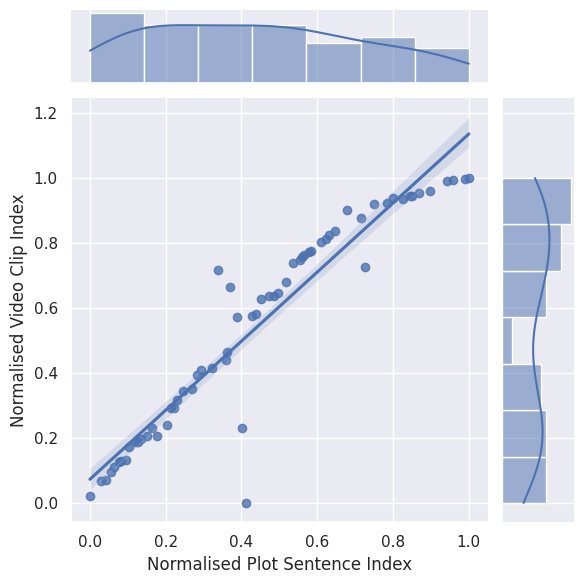

In [ ]:
sns.jointplot(anno_flight_df_drop0, x="Normalised Plot Sentence Index", y="Normalised Video Clip Index", kind='reg'); # marker="+"

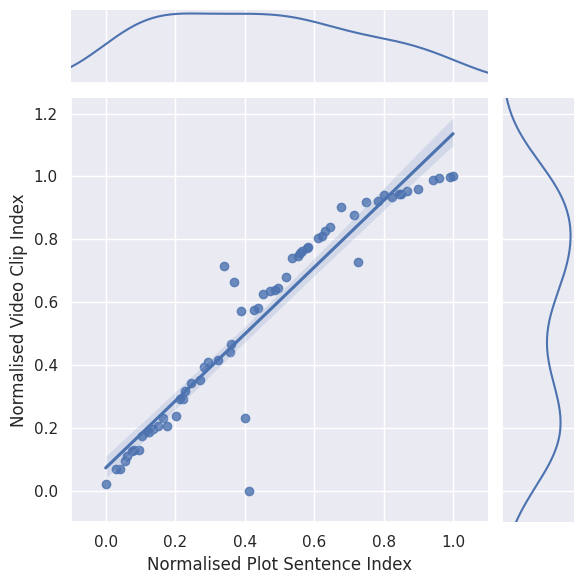

In [ ]:
g = sns.JointGrid(anno_flight_df_drop0, x="Normalised Plot Sentence Index", y="Normalised Video Clip Index", xlim=(-0.1, 1.1), ylim=(-0.1, 1.25))
g.plot(sns.regplot, sns.kdeplot);

In [ ]:
x = anno_flight_df_drop0['Normalised Plot Sentence Index']
y = anno_flight_df_drop0['Normalised Video Clip Index']
pg.corr(x, y, method='pearson')

,n,r,CI95%,p-val,BF10,power
pearson,63,0.945897,"[0.91, 0.97]",1.630666e-31,1.164e+28,1.0


In [ ]:
slope, intercept = np.polyfit(x, y, 1)
slope

1.0629186087535214

### The social network

In [36]:
# All the annotation sentences in this movie were alligned with movie clips
anno_tsn_df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CHR_Code/MExtract_TSN_NoDrop.csv')

In [37]:
scaler = preprocessing.MinMaxScaler()
anno_tsn_df['Normalised Video Clip Index'] = scaler.fit_transform(anno_tsn_df[['StartTime(s)']])
anno_tsn_df['Normalised Plot Sentence Index'] = scaler.fit_transform(anno_tsn_df[['start_point']])

In [43]:
anno_tsn_df.to_csv('anno_tsn_index.csv', index=False)

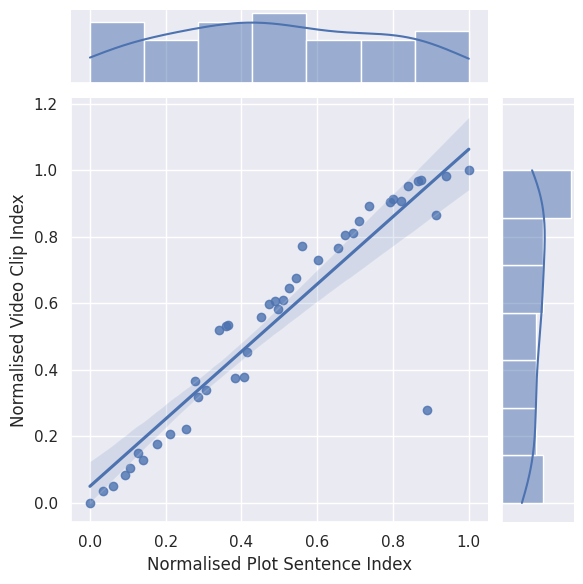

In [ ]:
sns.jointplot(anno_tsn_df, x="Normalised Plot Sentence Index", y="Normalised Video Clip Index", kind='reg'); # marker="+"

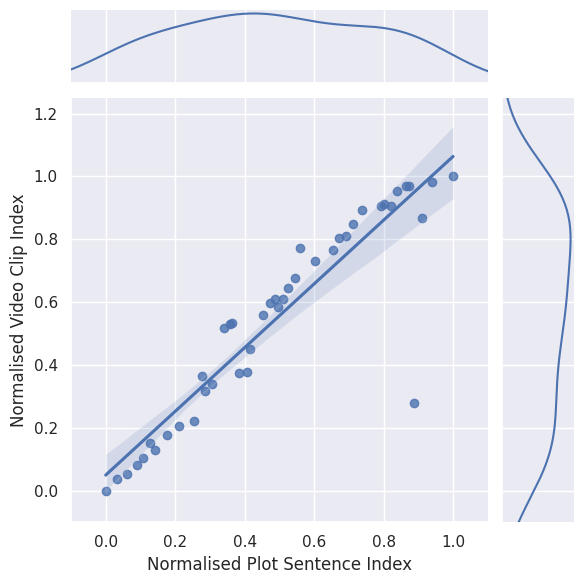

In [ ]:
g = sns.JointGrid(anno_tsn_df, x="Normalised Plot Sentence Index", y="Normalised Video Clip Index", xlim=(-0.1, 1.1), ylim=(-0.1, 1.25))
g.plot(sns.regplot, sns.kdeplot);

In [ ]:
x = anno_tsn_df['Normalised Plot Sentence Index']
y = anno_tsn_df['Normalised Video Clip Index']
pg.corr(x, y, method='pearson')

,n,r,CI95%,p-val,BF10,power
pearson,43,0.91758,"[0.85, 0.95]",5.052948e-18,8.748e+14,1.0


In [ ]:
slope, intercept = np.polyfit(x, y, 1)
slope

1.0133865703676677

### Cumulated distribution plot


In [38]:
df=pd.concat([anno_500_df_drop0, anno_tsn_df, anno_flight_df_drop0])

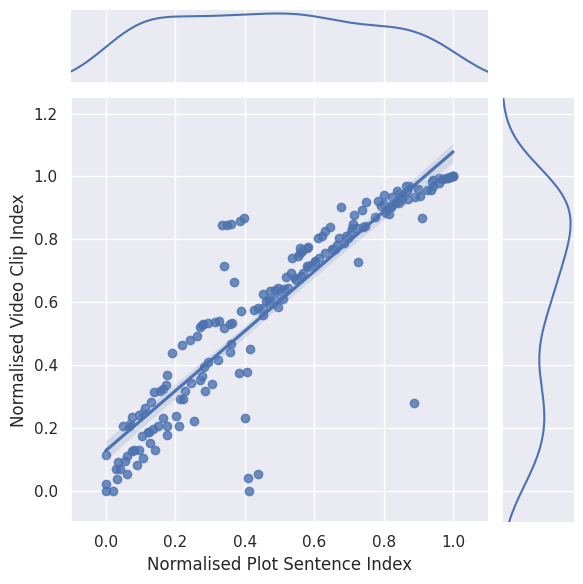

In [39]:
g = sns.JointGrid(df, x="Normalised Plot Sentence Index", y="Normalised Video Clip Index", xlim=(-0.1, 1.1), ylim=(-0.1, 1.25))
g.plot(sns.regplot, sns.kdeplot);

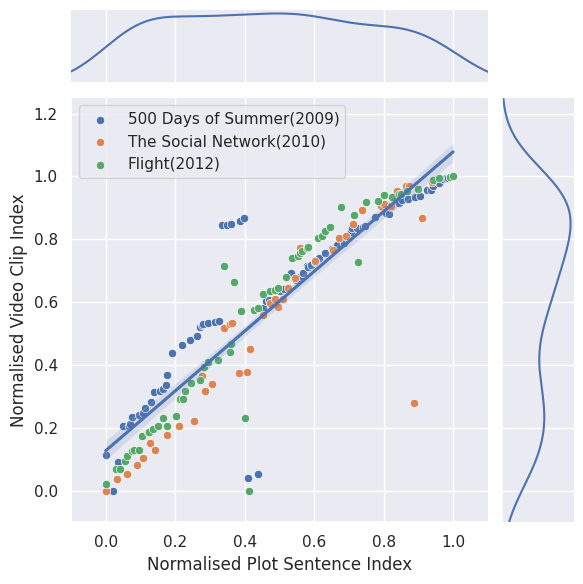

In [40]:
g = sns.JointGrid(data=df, x="Normalised Plot Sentence Index", y="Normalised Video Clip Index", xlim=(-0.1, 1.1), ylim=(-0.1, 1.25))

# Traverse each movie and draw the corresponding scatterplot
for i, movie_name in enumerate(df["MovieName"].unique()):
    movie_data = df[df["MovieName"] == movie_name]
    sns.scatterplot(data=movie_data, x="Normalised Plot Sentence Index", y="Normalised Video Clip Index",
                    palette=["red"], label=movie_name, ax=g.ax_joint)

# Add regression lines for all data
sns.regplot(data=df, x="Normalised Plot Sentence Index", y="Normalised Video Clip Index",
            scatter=False, color="#4C72B0", ax=g.ax_joint)

g.plot_marginals(sns.kdeplot)
g.ax_joint.legend()

plt.show()

In [ ]:
x = df['Normalised Plot Sentence Index']
y = df['Normalised Video Clip Index']
pg.corr(x, y, method='pearson')

,n,r,CI95%,p-val,BF10,power
pearson,184,0.908954,"[0.88, 0.93]",4.545282e-71,2.337e+67,1.0


In [ ]:
slope, intercept = np.polyfit(x, y, 1)
slope

0.9504085373771787